In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats 
import matplotlib.pyplot as plt
import hvplot.pandas
import tensorflow as tf
import holoviews as hv

from scipy import stats 
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Dropout
from tensorflow.keras.models import Model
from joblib import dump, load
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization 
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import AUC


pd.set_option('display.float', '{:.2f}'.format)
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)
data = pd.read_csv("lending_club_loan_two.csv")

data.shape


2024-11-30 22:42:13.210629: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-30 22:42:13.214474: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-30 22:42:13.225630: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1732995733.243975   13519 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1732995733.249369   13519 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-30 22:42:13.268141: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

(396030, 27)

In [2]:
data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.00,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.00,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.00,0.00,36369.00,41.80,25.00,w,INDIVIDUAL,0.00,0.00,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.00,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.00,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.00,0.00,20131.00,53.30,27.00,f,INDIVIDUAL,3.00,0.00,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.00,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.00,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.00,0.00,11987.00,92.20,26.00,f,INDIVIDUAL,0.00,0.00,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.00,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.00,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.00,0.00,5472.00,21.50,13.00,f,INDIVIDUAL,0.00,0.00,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.00,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.00,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.00,0.00,24584.00,69.80,43.00,f,INDIVIDUAL,1.00,0.00,"679 Luna Roads\nGreggshire, VA 11650"


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [4]:
data.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.00,396030.00,396030.00,396030.00,396030.00,396030.00,396030.00,396030.00,395754.00,396030.00,358235.00,395495.00
mean,14113.89,13.64,431.85,74203.18,17.38,11.31,0.18,15844.54,53.79,25.41,1.81,0.12
std,8357.44,4.47,250.73,61637.62,18.02,5.14,0.53,20591.84,24.45,11.89,2.15,0.36
min,500.00,5.32,16.08,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00
25%,8000.00,10.49,250.33,45000.00,11.28,8.00,0.00,6025.00,35.80,17.00,0.00,0.00
50%,12000.00,13.33,375.43,64000.00,16.91,10.00,0.00,11181.00,54.80,24.00,1.00,0.00
75%,20000.00,16.49,567.30,90000.00,22.98,14.00,0.00,19620.00,72.90,32.00,3.00,0.00
max,40000.00,30.99,1533.81,8706582.00,9999.00,90.00,86.00,1743266.00,892.30,151.00,34.00,8.00


In [5]:
data.describe(include=object)

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose,title,earliest_cr_line,initial_list_status,application_type,address
count,396030,396030,396030,373103,377729,396030,396030,396030,396030,396030,394274,396030,396030,396030,396030
unique,2,7,35,173105,11,6,3,115,2,14,48816,684,2,3,393700
top,36 months,B,B3,Teacher,10+ years,MORTGAGE,Verified,Oct-2014,Fully Paid,debt_consolidation,Debt consolidation,Oct-2000,f,INDIVIDUAL,USCGC Smith\nFPO AE 70466
freq,302005,116018,26655,4389,126041,198348,139563,14846,318357,234507,152472,3017,238066,395319,8


In [6]:
# Current Loan Status
data['loan_status'].value_counts().hvplot.bar(
    title="Loan Status Counts", xlabel='Loan Status', ylabel='Count', 
    width=500, height=350
)

:Bars   [loan_status]   (count)

<>:37: SyntaxWarning: invalid escape sequence '\d'
<>:40: SyntaxWarning: invalid escape sequence '\d'
<>:37: SyntaxWarning: invalid escape sequence '\d'
<>:40: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_13519/726989943.py:37: SyntaxWarning: invalid escape sequence '\d'
  data['term'] = data['term'].astype(str).str.extract('(\d+)').astype(float)
/tmp/ipykernel_13519/726989943.py:40: SyntaxWarning: invalid escape sequence '\d'
  data['emp_length'] = data['emp_length'].astype(str).str.extract('(\d+)')  # Extract numeric part
/tmp/ipykernel_13519/726989943.py:42: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col

   loan_amnt  term  int_rate  installment  grade  sub_grade  emp_title  \
0   10000.00 36.00     11.44       329.48      1          8      80662   
1    8000.00 36.00     11.99       265.68      1          9      33201   
2   15600.00 36.00     10.49       506.97      1          7     126709   
3    7200.00 36.00      6.49       220.65      0          1      27667   
4   24375.00 60.00     17.27       609.33      2         14      38168   

   emp_length  home_ownership  annual_inc  verification_status  loan_status  \
0       10.00               3   117000.00                    1            1   
1        4.00               4    65000.00                    1            1   
2        1.00               3    43057.00                    2            1   
3        6.00               3    54000.00                    1            1   
4        9.00               4    55000.00                    3            0   

   purpose  title   dti  earliest_cr_line  open_acc  revol_bal  revol_util  \
0 

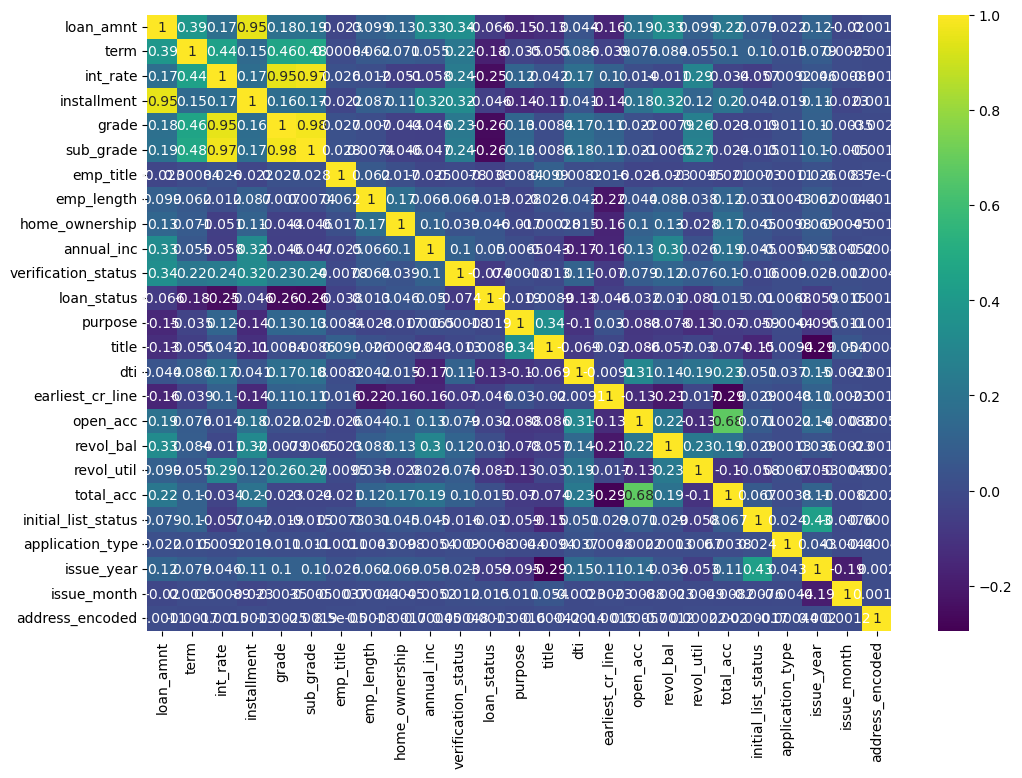

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Load the dataset
data = pd.read_csv("lending_club_loan_two.csv")

# Define mappings for non-numeric columns
home_ownership_mapping = {'MORTGAGE': 4,
                          'RENT': 3,
                          'OWN': 5,
                          'ANY': 2,
                          'OTHER': 1,
                          'NONE': 0}

term_mapping = {'36 months': 1,
                '60 months': 2}

application_type_mapping = {'INDIVIDUAL': 1,
                            'JOINT': 2}

verification_status_mapping = {
    'Not Verified': 1,
    'Source Verified': 2,
    'Verified': 3
}

loan_status_mapping = {
    'Fully Paid': 1,
    'Charged Off': 0
}
data = data.drop(columns=['mort_acc', 'pub_rec', 'pub_rec_bankruptcies'])
# Convert non-numeric columns to numeric where applicable
if 'term' in data.columns:
    data['term'] = data['term'].astype(str).str.extract('(\d+)').astype(float)

if 'emp_length' in data.columns:
    data['emp_length'] = data['emp_length'].astype(str).str.extract('(\d+)')  # Extract numeric part
    data['emp_length'] = pd.to_numeric(data['emp_length'], errors='coerce')  # Convert to numeric
    data['emp_length'].fillna(data['emp_length'].median(), inplace=True)  # Fill missing values with median

if 'home_ownership' in data.columns:
    data['home_ownership'] = data['home_ownership'].map(home_ownership_mapping)

# Convert verification_status to numeric using the mapping
data['verification_status'] = data['verification_status'].map(verification_status_mapping)

# Map loan_status to numerical values
data['loan_status'] = data['loan_status'].map(loan_status_mapping)

# Map application_type to numerical values
data['application_type'] = data['application_type'].map(application_type_mapping)

# Convert 'issue_d' column to datetime
data['issue_d'] = pd.to_datetime(data['issue_d'])

# Extract year and month from 'issue_d'
data['issue_year'] = data['issue_d'].dt.year
data['issue_month'] = data['issue_d'].dt.month

# Drop 'issue_d' column as it's no longer needed
data = data.drop('issue_d', axis=1)

# Drop rows with missing values
data = data.dropna()

# Convert 'purpose' and 'title' columns using label encoding
label_encoder = LabelEncoder()
data['purpose'] = label_encoder.fit_transform(data['purpose'])
data['title'] = label_encoder.fit_transform(data['title'])

# Include 'earliest_cr_line' column in numeric_data
if 'earliest_cr_line' in data.columns:
    data['earliest_cr_line'] = pd.to_datetime(data['earliest_cr_line']).dt.year

# Use label encoding for 'emp_title', 'grade', and 'sub_grade' columns
label_columns = ['emp_title', 'grade', 'sub_grade']
for column in label_columns:
    data[column] = label_encoder.fit_transform(data[column])

# Encode the 'initial_list_status' column
data['initial_list_status'] = data['initial_list_status'].apply(lambda x: 1 if x == 'w' else 0)

# Initialize label encoder for the 'address' column
label_encoder_address = LabelEncoder()

# Encode the 'address' column
data['address_encoded'] = label_encoder_address.fit_transform(data['address'])

# Compute correlation matrix for numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# Include the encoded 'address' column in numeric_data
numeric_data['address_encoded'] = data['address_encoded']

print(numeric_data.head())  # Print the numeric_data DataFrame to check if all desired columns are included

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='viridis')
plt.show()


In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats 
import matplotlib.pyplot as plt
import hvplot.pandas
data = pd.read_csv("lending_club_loan_two.csv")

installment = data.hvplot.hist(
    y='installment', by='loan_status', subplots=False, 
    width=350, height=400, bins=50, alpha=0.4, 
    title="Installment by Loan Status", 
    xlabel='Installment', ylabel='Counts', legend='top'
)

loan_amnt = data.hvplot.hist(
    y='loan_amnt', by='loan_status', subplots=False, 
    width=350, height=400, bins=30, alpha=0.4, 
    title="Loan Amount by Loan Status", 
    xlabel='Loan Amount', ylabel='Counts', legend='top'
)

installment + loan_amnt

:Layout
   .NdOverlay.I  :NdOverlay   [loan_status]
      :Histogram   [installment]   (Count)
   .NdOverlay.II :NdOverlay   [loan_status]
      :Histogram   [loan_amnt]   (Count)

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats 
import matplotlib.pyplot as plt
import hvplot.pandas
data = pd.read_csv("lending_club_loan_two.csv")
loan_amnt_box = data.hvplot.box(
    y='loan_amnt', subplots=True, by='loan_status', width=300, height=350, 
    title="Loan Status by Loan Amount ", xlabel='Loan Status', ylabel='Loan Amount'
)

installment_box = data.hvplot.box(
    y='installment', subplots=True, by='loan_status', width=300, height=350, 
    title="Loan Status by Installment", xlabel='Loan Status', ylabel='Installment'
)

loan_amnt_box + installment_box

:Layout
   .BoxWhisker.I  :BoxWhisker   [loan_status]   (loan_amnt)
   .BoxWhisker.II :BoxWhisker   [loan_status]   (installment)

In [10]:

data.groupby(by='loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.00,15126.30,8505.09,1000.00,8525.00,14000.00,20000.00,40000.00
Fully Paid,318357.00,13866.88,8302.32,500.00,7500.00,12000.00,19225.00,40000.00


In [11]:

print(f"GRADE unique: {data.grade.unique()}")
print(f"SUB_GRADE unique: {data.sub_grade.unique()}")

GRADE unique: ['B' 'A' 'C' 'E' 'D' 'F' 'G']
SUB_GRADE unique: ['B4' 'B5' 'B3' 'A2' 'C5' 'C3' 'A1' 'B2' 'C1' 'A5' 'E4' 'A4' 'A3' 'D1'
 'C2' 'B1' 'D3' 'D5' 'D2' 'E1' 'E2' 'E5' 'F4' 'E3' 'D4' 'G1' 'F5' 'G2'
 'C4' 'F1' 'F3' 'G5' 'G4' 'F2' 'G3']


In [12]:

fully_paid = data.loc[data['loan_status']=='Fully Paid', 'grade'].value_counts().hvplot.bar() 
charged_off = data.loc[data['loan_status']=='Charged Off', 'grade'].value_counts().hvplot.bar() 

(fully_paid * charged_off).opts(
    title="Loan Status by Grade", xlabel='Grades', ylabel='Count',
    width=500, height=450, legend_cols=2, legend_position='top_right', xrotation=90
)

:Overlay
   .Bars.Count.I  :Bars   [grade]   (count)
   .Bars.Count.II :Bars   [grade]   (count)

In [13]:

fully_paid = data.loc[data['loan_status']=='Fully Paid', 'sub_grade'].value_counts().hvplot.bar() 
charged_off = data.loc[data['loan_status']=='Charged Off', 'sub_grade'].value_counts().hvplot.bar() 

(fully_paid * charged_off).opts(
    title="Loan Status by Grade", xlabel='Grades', ylabel='Count',
    width=500, height=400, legend_cols=2, legend_position='top_right', xrotation=90
)

:Overlay
   .Bars.Count.I  :Bars   [sub_grade]   (count)
   .Bars.Count.II :Bars   [sub_grade]   (count)

/tmp/ipykernel_13519/2110451320.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=90);


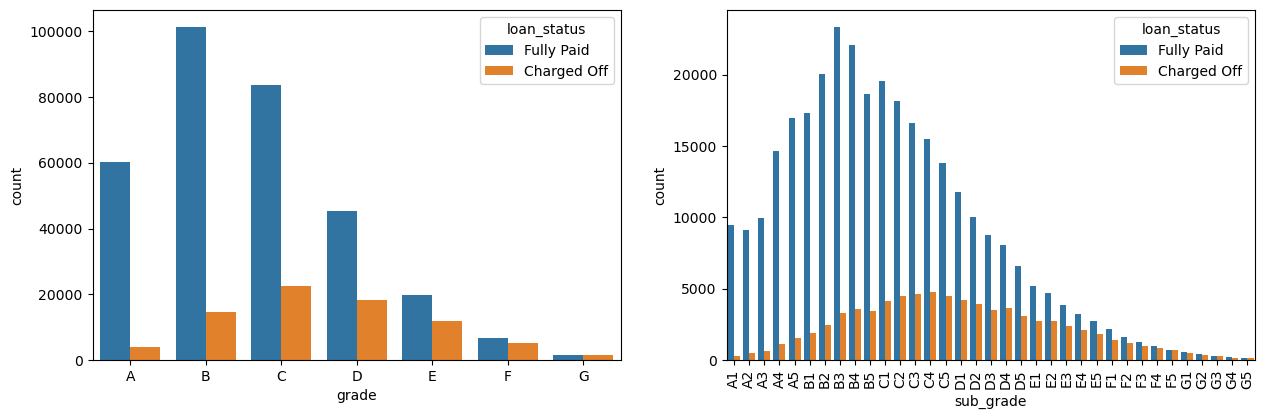

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats 
import matplotlib.pyplot as plt
import hvplot.pandas
data = pd.read_csv("lending_club_loan_two.csv")

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
grade = sorted(data.grade.unique().tolist())
sns.countplot(x='grade', data=data, hue='loan_status', order=grade)

plt.subplot(2, 2, 2)
sub_grade = sorted(data.sub_grade.unique().tolist())
g = sns.countplot(x='sub_grade', data=data, hue='loan_status', order=sub_grade)
g.set_xticklabels(g.get_xticklabels(), rotation=90);

<Axes: xlabel='sub_grade', ylabel='count'>

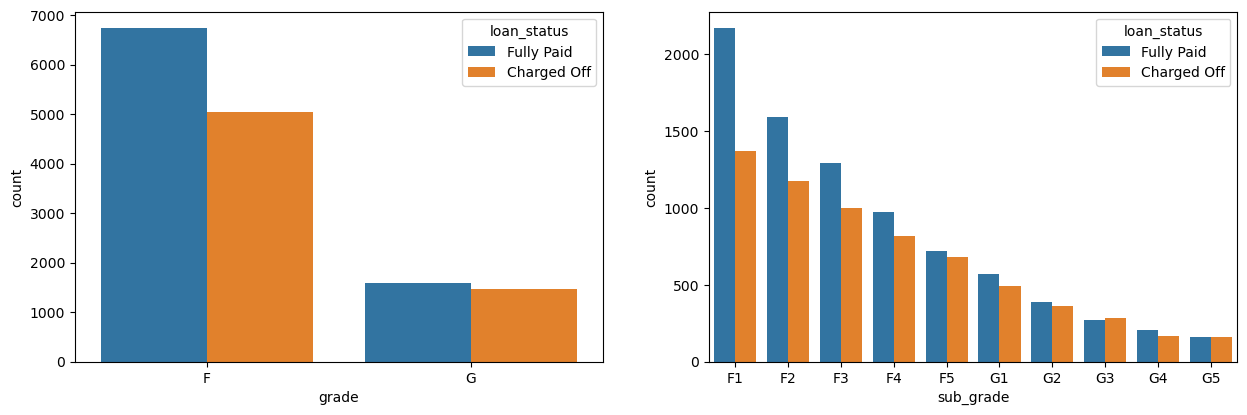

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats 
import matplotlib.pyplot as plt
import hvplot.pandas
data = pd.read_csv("lending_club_loan_two.csv")

df = data[(data.grade == 'F') | (data.grade == 'G')]

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
grade = sorted(df.grade.unique().tolist())
sns.countplot(x='grade', data=df, hue='loan_status', order=grade)

plt.subplot(2, 2, 2)
sub_grade = sorted(df.sub_grade.unique().tolist())
sns.countplot(x='sub_grade', data=df, hue='loan_status', order=sub_grade)

In [16]:


data['home_ownership'].value_counts()

home_ownership
MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: count, dtype: int64

In [17]:


fully_paid = data.loc[data['loan_status']=='Fully Paid', 'home_ownership'].value_counts().hvplot.bar() 
charged_off = data.loc[data['loan_status']=='Charged Off', 'home_ownership'].value_counts().hvplot.bar()

home_ownership_count = (fully_paid * charged_off).opts(
    title="Loan Status by Grade", xlabel='Home Ownership', ylabel='Count',
    width=350, height=350, legend_cols=2, legend_position='top_right'
).opts(xrotation=90)

home_ownership = data.home_ownership.value_counts().hvplot.bar(
    title="Loan Status by Grade", xlabel='Home Ownership', ylabel='Count', 
    width=350, height=350, legend='top'
).opts(xrotation=90)

(home_ownership_count + home_ownership)

:Layout
   .Overlay.Count :Overlay
      .Bars.Count.I  :Bars   [home_ownership]   (count)
      .Bars.Count.II :Bars   [home_ownership]   (count)
   .Bars.Count    :Bars   [home_ownership]   (count)

In [18]:


data.loc[(data.home_ownership == 'ANY') | (data.home_ownership == 'NONE'), 'home_ownership'] = 'OTHER'  
data.home_ownership.value_counts()

home_ownership
MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          146
Name: count, dtype: int64

/tmp/ipykernel_13519/1286582770.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=90);


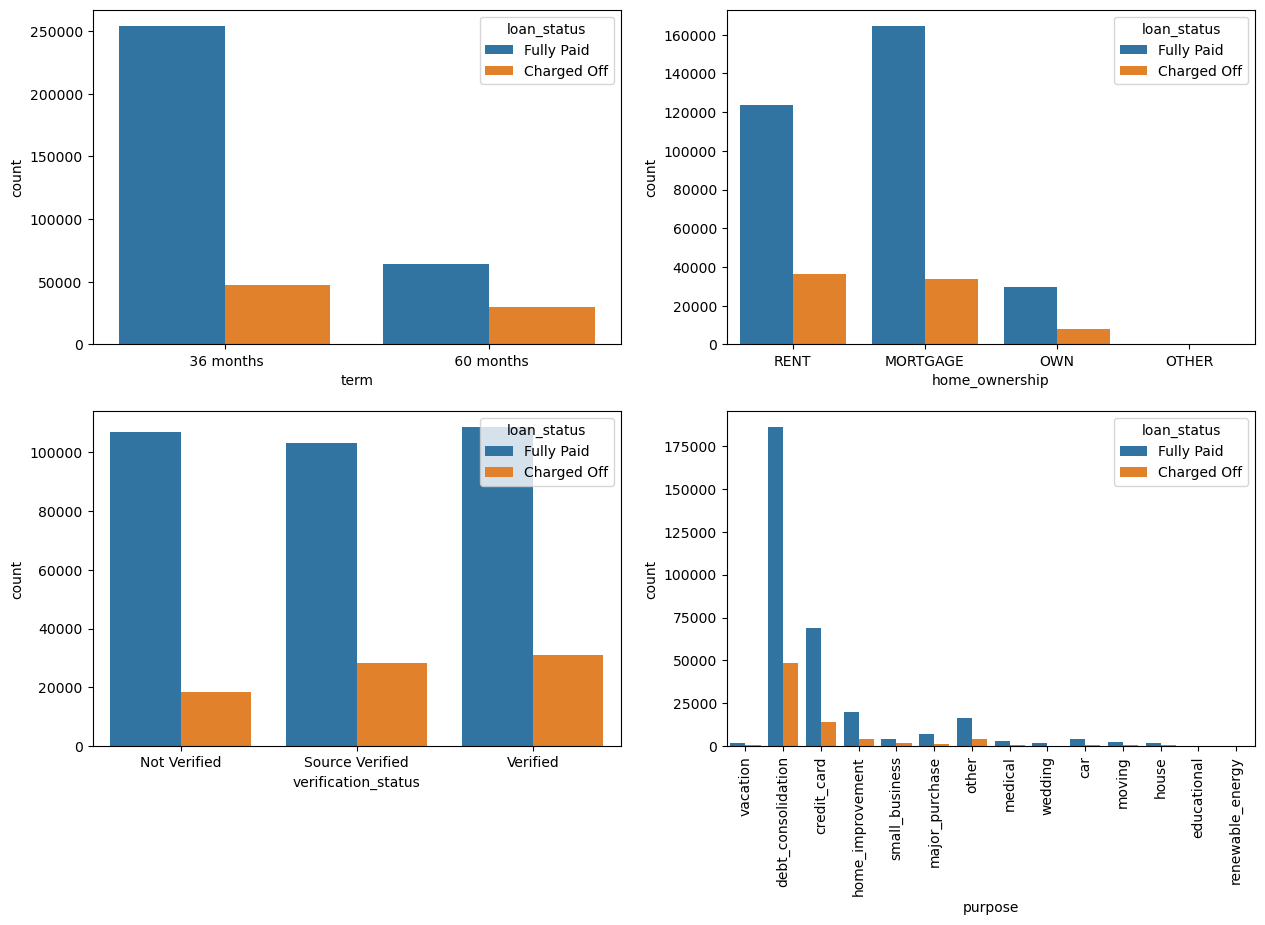

In [19]:


plt.figure(figsize=(15, 20))

plt.subplot(4, 2, 1)
sns.countplot(x='term', data=data, hue='loan_status')

plt.subplot(4, 2, 2)
sns.countplot(x='home_ownership', data=data, hue='loan_status')

plt.subplot(4, 2, 3)
sns.countplot(x='verification_status', data=data, hue='loan_status')

plt.subplot(4, 2, 4)
g = sns.countplot(x='purpose', data=data, hue='loan_status')
g.set_xticklabels(g.get_xticklabels(), rotation=90);

In [20]:


data.loc[data['home_ownership']=='OTHER', 'loan_status'].value_counts()

loan_status
Fully Paid     123
Charged Off     23
Name: count, dtype: int64

In [21]:


int_rate = data.hvplot.hist(
    y='int_rate', by='loan_status', alpha=0.3, width=350, height=400,
    title="Loan Status by Interest Rate", xlabel='Interest Rate', ylabel='Loans Counts', 
    legend='top'
)

annual_inc = data.hvplot.hist(
    y='annual_inc', by='loan_status', bins=50, alpha=0.3, width=350, height=400,
    title="Loan Status by Annual Income", xlabel='Annual Income', ylabel='Loans Counts', 
    legend='top'
).opts(xrotation=45)

int_rate + annual_inc

:Layout
   .NdOverlay.I  :NdOverlay   [loan_status]
      :Histogram   [int_rate]   (Count)
   .NdOverlay.II :NdOverlay   [loan_status]
      :Histogram   [annual_inc]   (Count)

In [22]:


data[data.annual_inc <= 250000].hvplot.hist(
    y='annual_inc', by='loan_status', bins=50, alpha=0.3, width=500, height=400,
    title="Loan Status by Annual Income (<= 250000/Year)", 
    xlabel='Annual Income', ylabel='Loans Counts', legend='top'
).opts(xrotation=45)

:NdOverlay   [loan_status]
   :Histogram   [annual_inc]   (Count)

In [23]:


print((data[data.annual_inc >= 250000].shape[0] / data.shape[0]) * 100)
print((data[data.annual_inc >= 1000000].shape[0] / data.shape[0]) * 100)

1.0294674645860162
0.018937959245511705


In [24]:

data.loc[data.annual_inc >= 1000000, 'loan_status'].value_counts()

loan_status
Fully Paid     65
Charged Off    10
Name: count, dtype: int64

In [25]:


data.loc[data.annual_inc >= 250000, 'loan_status'].value_counts()

loan_status
Fully Paid     3509
Charged Off     568
Name: count, dtype: int64

In [26]:


print(data.emp_title.isna().sum())
print(data.emp_title.nunique())

22927
173105


In [27]:


data['emp_title'].value_counts()[:20]

emp_title
Teacher                     4389
Manager                     4250
Registered Nurse            1856
RN                          1846
Supervisor                  1830
Sales                       1638
Project Manager             1505
Owner                       1410
Driver                      1339
Office Manager              1218
manager                     1145
Director                    1089
General Manager             1074
Engineer                     995
teacher                      962
driver                       882
Vice President               857
Operations Manager           763
Administrative Assistant     756
Accountant                   748
Name: count, dtype: int64

/tmp/ipykernel_13519/313446252.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=90);


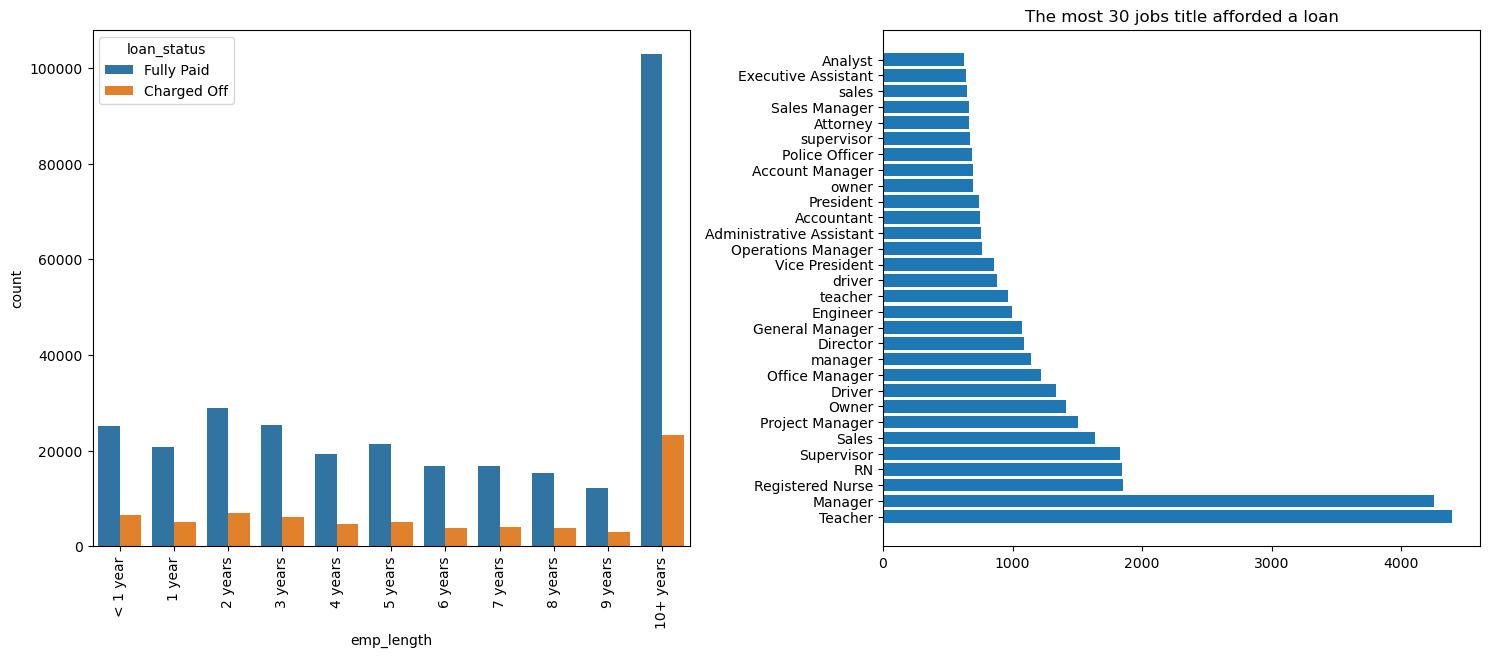

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats 
import matplotlib.pyplot as plt
import hvplot.pandas
data = pd.read_csv("lending_club_loan_two.csv")

plt.figure(figsize=(15, 12))

plt.subplot(2, 2, 1)
order = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', 
          '6 years', '7 years', '8 years', '9 years', '10+ years',]
g = sns.countplot(x='emp_length', data=data, hue='loan_status', order=order)
g.set_xticklabels(g.get_xticklabels(), rotation=90);

plt.subplot(2, 2, 2)
plt.barh(data.emp_title.value_counts()[:30].index, data.emp_title.value_counts()[:30])
plt.title("The most 30 jobs title afforded a loan")
plt.tight_layout()

In [29]:


data['earliest_cr_line'].value_counts()

earliest_cr_line
Oct-2000    3017
Aug-2000    2935
Oct-2001    2896
Aug-2001    2884
Nov-2000    2736
            ... 
Jul-1958       1
Nov-1957       1
Jan-1953       1
Jul-1955       1
Aug-1959       1
Name: count, Length: 684, dtype: int64

In [30]:


data['issue_d'] = pd.to_datetime(data['issue_d'])
data['earliest_cr_line'] = pd.to_datetime(data['earliest_cr_line'])

/tmp/ipykernel_13519/434460647.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['issue_d'] = pd.to_datetime(data['issue_d'])
/tmp/ipykernel_13519/434460647.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['earliest_cr_line'] = pd.to_datetime(data['earliest_cr_line'])


In [31]:


fully_paid = data.loc[data['loan_status']=='Fully Paid', 'issue_d'].hvplot.hist(bins=35) 
charged_off = data.loc[data['loan_status']=='Charged Off', 'issue_d'].hvplot.hist(bins=35)

# fully_paid * charged_off
loan_issue_date = (fully_paid * charged_off).opts(
    title="Loan Status by Loan Issue Date", xlabel='Loan Issue Date', ylabel='Count',
    width=350, height=350, legend_cols=2, legend_position='top_right'
).opts(xrotation=45)

fully_paid = data.loc[data['loan_status']=='Fully Paid', 'earliest_cr_line'].hvplot.hist(bins=35) 
charged_off = data.loc[data['loan_status']=='Charged Off', 'earliest_cr_line'].hvplot.hist(bins=35)

earliest_cr_line = (fully_paid * charged_off).opts(
    title="Loan Status by earliest_cr_line", xlabel='earliest_cr_line', ylabel='Count',
    width=350, height=350, legend_cols=2, legend_position='top_right'
).opts(xrotation=45)

loan_issue_date + earliest_cr_line

:Layout
   .Overlay.I  :Overlay
      .Histogram.I  :Histogram   [issue_d]   (Count)
      .Histogram.II :Histogram   [issue_d]   (Count)
   .Overlay.II :Overlay
      .Histogram.I  :Histogram   [earliest_cr_line]   (Count)
      .Histogram.II :Histogram   [earliest_cr_line]   (Count)

In [32]:


data.title.isna().sum()

1756

In [33]:


data['title'] = data.title.str.lower()

In [34]:


data.title.value_counts()[:10]

title
debt consolidation           168108
credit card refinancing       51781
home improvement              17117
other                         12993
consolidation                  5583
major purchase                 4998
debt consolidation loan        3513
business                       3017
medical expenses               2820
credit card consolidation      2638
Name: count, dtype: int64

In [35]:


data.dti.value_counts()

dti
0.00     313
14.40    310
19.20    302
16.80    301
18.00    300
        ... 
59.18      1
48.37      1
45.71      1
42.38      1
55.53      1
Name: count, Length: 4262, dtype: int64

In [36]:


dti = data.hvplot.hist(
    y='dti', bins=50, width=350, height=350, 
    title="dti Distribution", xlabel='dti', ylabel='Count'
)

sub_dti = data[data['dti']<=50].hvplot.hist(
    y='dti', bins=50, width=350, height=350, 
    title="dti (<=30) Distribution", xlabel='dti', ylabel='Count', shared_axes=False
)

dti + sub_dti

:Layout
   .Histogram.I  :Histogram   [dti]   (Count)
   .Histogram.II :Histogram   [dti]   (Count)

In [37]:


print(data[data['dti']>=40].shape)

(296, 27)


In [38]:


data.loc[data['dti']>=50, 'loan_status'].value_counts()

loan_status
Fully Paid     26
Charged Off     9
Name: count, dtype: int64

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats 
import matplotlib.pyplot as plt
import hvplot.pandas
data = pd.read_csv("lending_club_loan_two.csv")

dti = data[data['dti']<=50].hvplot.hist(
    y='dti', by='loan_status', bins=50, width=300, height=350, 
    title="dti (<=30) Distribution", xlabel='dti', ylabel='Count', 
    alpha=0.3, legend='top'
)

title="Loan Status by The number of open credit lines"

open_acc = data.hvplot.hist(
    y='open_acc', by='loan_status', bins=50, width=300, height=350, 
    title=title, xlabel='The number of open credit lines', ylabel='Count', 
    alpha=0.4, legend='top'
)

title="Loan Status by The total number of credit lines"

total_acc = data.hvplot.hist(
    y='total_acc', by='loan_status', bins=50, width=300, height=350, 
    title=title, xlabel='The total number of credit lines', ylabel='Count', 
    alpha=0.4, legend='top'
)

dti + open_acc + total_acc

:Layout
   .NdOverlay.I   :NdOverlay   [loan_status]
      :Histogram   [dti]   (Count)
   .NdOverlay.II  :NdOverlay   [loan_status]
      :Histogram   [open_acc]   (Count)
   .NdOverlay.III :NdOverlay   [loan_status]
      :Histogram   [total_acc]   (Count)

In [40]:


print(data.shape)
print(data[data.open_acc > 40].shape)

(396030, 27)
(217, 27)


In [41]:


print(data.shape)
print(data[data.total_acc > 80].shape)

(396030, 27)
(266, 27)


In [42]:


print(data.shape)
print(data[data.revol_util > 120].shape)

(396030, 27)
(27, 27)


In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats 
import matplotlib.pyplot as plt
import hvplot.pandas
data = pd.read_csv("lending_club_loan_two.csv")
title="Loan Status by Revolving line utilization rate"

revol_util = data.hvplot.hist(
    y='revol_util', by='loan_status', bins=50, width=350, height=400, 
    title=title, xlabel='Revolving line utilization rate', ylabel='Count', 
    alpha=0.4, legend='top'
)

title="Loan Status by Revolving line utilization rate (<120)"

sub_revol_util = data[data.revol_util < 120].hvplot.hist(
    y='revol_util', by='loan_status', bins=50, width=350, height=400, 
    title=title, xlabel='Revolving line utilization rate', ylabel='Count', 
    shared_axes=False, alpha=0.4, legend='top'
)

revol_util + sub_revol_util

:Layout
   .NdOverlay.I  :NdOverlay   [loan_status]
      :Histogram   [revol_util]   (Count)
   .NdOverlay.II :NdOverlay   [loan_status]
      :Histogram   [revol_util]   (Count)

In [44]:

data[data.revol_util > 200]

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
137211,3500.00,36 months,12.49,117.08,B,B4,Budget Analyst,10+ years,RENT,45000.00,Verified,Apr-2014,Fully Paid,debt_consolidation,Debt consolidation,14.67,Oct-1998,2.00,0.00,2677.00,892.30,9.00,f,INDIVIDUAL,0.00,0.00,"12506 Connie Burg\nVelasquezfort, TN 00813"


In [45]:

print(data.shape)
print(data[data.revol_bal > 250000].shape)

(396030, 27)
(397, 27)


In [46]:

title = "Loan Status by Total credit revolving balance"

revol_bal = data.hvplot.hist(
    y='revol_bal', by='loan_status', bins=50, width=350, height=400, 
    title=title, xlabel='Total credit revolving balance', ylabel='Count', 
    alpha=0.4, legend='top'
)

title = "Loan Status by Total credit revolving balance (<250000)"

sub_revol_bal = data[data['revol_bal']<=250000].hvplot.hist(
    y='revol_bal', by='loan_status', bins=50, width=350, height=400, 
    title=title, xlabel='Total credit revolving balance', ylabel='Count', 
    alpha=0.4, legend='top', shared_axes=False
).opts(xrotation=45)

revol_bal + sub_revol_bal

:Layout
   .NdOverlay.I  :NdOverlay   [loan_status]
      :Histogram   [revol_bal]   (Count)
   .NdOverlay.II :NdOverlay   [loan_status]
      :Histogram   [revol_bal]   (Count)

In [47]:


data.loc[data.revol_bal > 250000, 'loan_status'].value_counts()

loan_status
Fully Paid     351
Charged Off     46
Name: count, dtype: int64

In [48]:


xlabel = 'Number of derogatory public records'
title = "Loan Status by Number of derogatory public records"

fully_paid = data.loc[data['loan_status']=='Fully Paid', 'pub_rec'].value_counts().hvplot.bar() 
charged_off = data.loc[data['loan_status']=='Charged Off', 'pub_rec'].value_counts().hvplot.bar()

(fully_paid * charged_off).opts(
    title=title, xlabel=xlabel, ylabel='Count',
    width=400, height=400, legend_cols=2, legend_position='top_right'
)

:Overlay
   .Bars.Count.I  :Bars   [pub_rec]   (count)
   .Bars.Count.II :Bars   [pub_rec]   (count)

In [49]:


xlabel = "The initial listing status of the loan"
title = "Loan Status by The initial listing status of the loan"

fully_paid = data.loc[data['loan_status']=='Fully Paid', 'initial_list_status'].value_counts().hvplot.bar() 
charged_off = data.loc[data['loan_status']=='Charged Off', 'initial_list_status'].value_counts().hvplot.bar()

(fully_paid * charged_off).opts(
    title=title, xlabel=xlabel, ylabel='Count',
    width=400, height=400, legend_cols=2, legend_position='top_right'
)

:Overlay
   .Bars.Count.I  :Bars   [initial_list_status]   (count)
   .Bars.Count.II :Bars   [initial_list_status]   (count)

In [50]:


fully_paid = data.loc[data['loan_status']=='Fully Paid', 'application_type'].value_counts().hvplot.bar() 
charged_off = data.loc[data['loan_status']=='Charged Off', 'application_type'].value_counts().hvplot.bar()

(fully_paid * charged_off).opts(
    title="Loan Status by Application Type", xlabel="Application Type", ylabel='Count',
    width=400, height=400, legend_cols=2, legend_position='top_right'
)

:Overlay
   .Bars.Count.I  :Bars   [application_type]   (count)
   .Bars.Count.II :Bars   [application_type]   (count)

In [51]:

xlabel = "Number of public record bankruptcies"
title = "Loan Status by The Number of public record bankruptcies"

fully_paid = data.loc[data['loan_status']=='Fully Paid', 'pub_rec_bankruptcies'].value_counts().hvplot.bar() 
charged_off = data.loc[data['loan_status']=='Charged Off', 'pub_rec_bankruptcies'].value_counts().hvplot.bar()

(fully_paid * charged_off).opts(
    title=title, xlabel=xlabel, ylabel='Count',
    width=400, height=400, legend_cols=2, legend_position='top_right'
)

:Overlay
   .Bars.Count.I  :Bars   [pub_rec_bankruptcies]   (count)
   .Bars.Count.II :Bars   [pub_rec_bankruptcies]   (count)

In [52]:

def pub_rec(number):
    if number == 0.0:
        return 0
    else:
        return 1
    
def mort_acc(number):
    if number == 0.0:
        return 0
    elif number >= 1.0:
        return 1
    else:
        return number
    
def pub_rec_bankruptcies(number):
    if number == 0.0:
        return 0
    elif number >= 1.0:
        return 1
    else:
        return number

In [53]:


data['pub_rec'] = data.pub_rec.apply(pub_rec)
data['mort_acc'] = data.mort_acc.apply(mort_acc)
data['pub_rec_bankruptcies'] = data.pub_rec_bankruptcies.apply(pub_rec_bankruptcies)

<Axes: xlabel='pub_rec_bankruptcies', ylabel='count'>

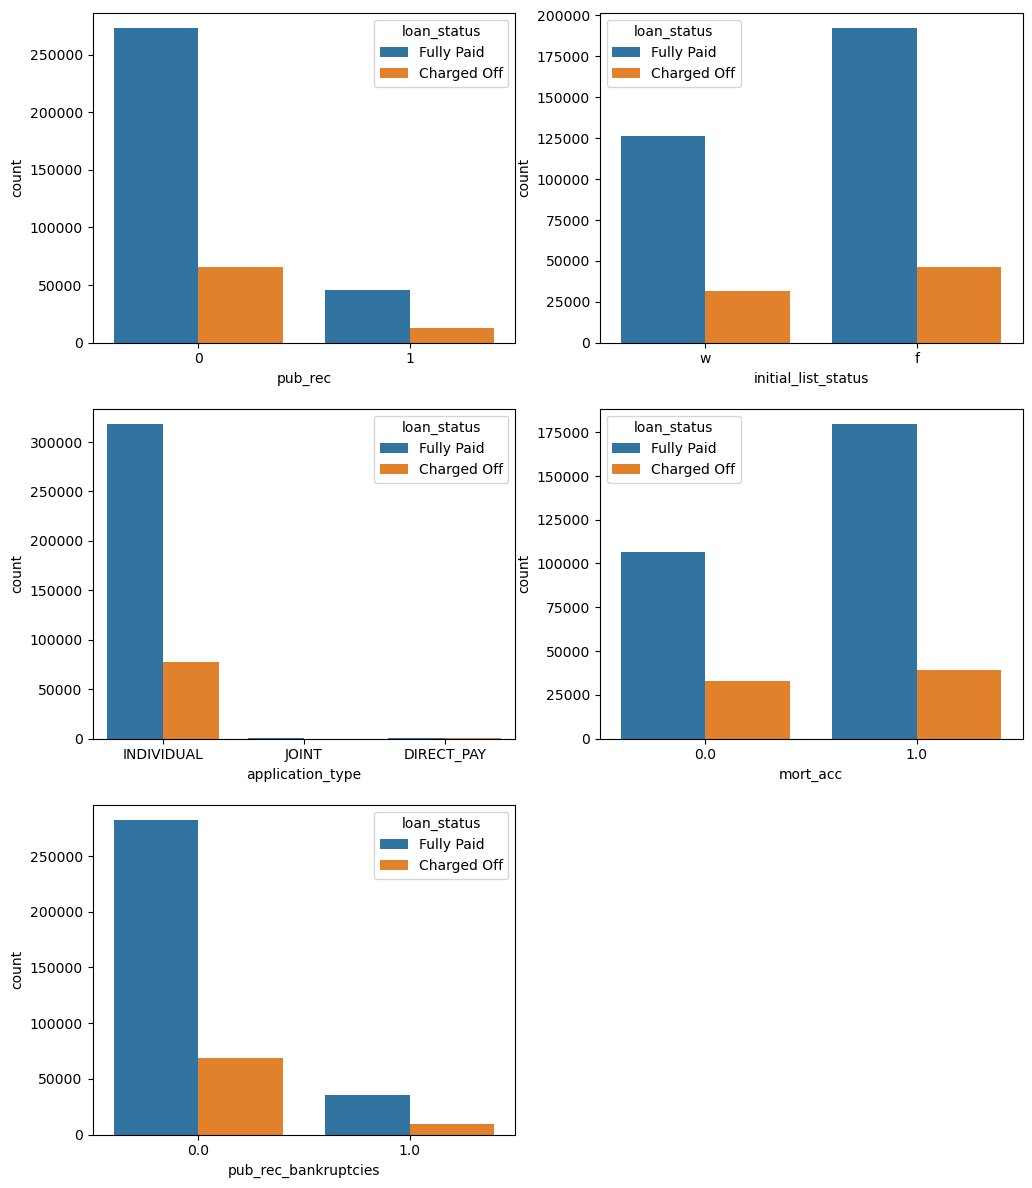

In [54]:


plt.figure(figsize=(12, 30))

plt.subplot(6, 2, 1)
sns.countplot(x='pub_rec', data=data, hue='loan_status')

plt.subplot(6, 2, 2)
sns.countplot(x='initial_list_status', data=data, hue='loan_status')

plt.subplot(6, 2, 3)
sns.countplot(x='application_type', data=data, hue='loan_status')

plt.subplot(6, 2, 4)
sns.countplot(x='mort_acc', data=data, hue='loan_status')

plt.subplot(6, 2, 5)
sns.countplot(x='pub_rec_bankruptcies', data=data, hue='loan_status')

In [55]:


data['loan_status'] = data.loan_status.map({'Fully Paid':1, 'Charged Off':0})

<>:19: SyntaxWarning: invalid escape sequence '\d'
<>:22: SyntaxWarning: invalid escape sequence '\d'
<>:19: SyntaxWarning: invalid escape sequence '\d'
<>:22: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_13519/1852704858.py:19: SyntaxWarning: invalid escape sequence '\d'
  data['term'] = data['term'].str.extract('(\d+)').astype(float)
/tmp/ipykernel_13519/1852704858.py:22: SyntaxWarning: invalid escape sequence '\d'
  data['emp_length'] = data['emp_length'].str.extract('(\d+)').astype(float)
/tmp/ipykernel_13519/1852704858.py:37: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['issue_d'] = pd.to_datetime(data['issue_d'])
/tmp/ipykernel_13519/1852704858.py:53: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify 

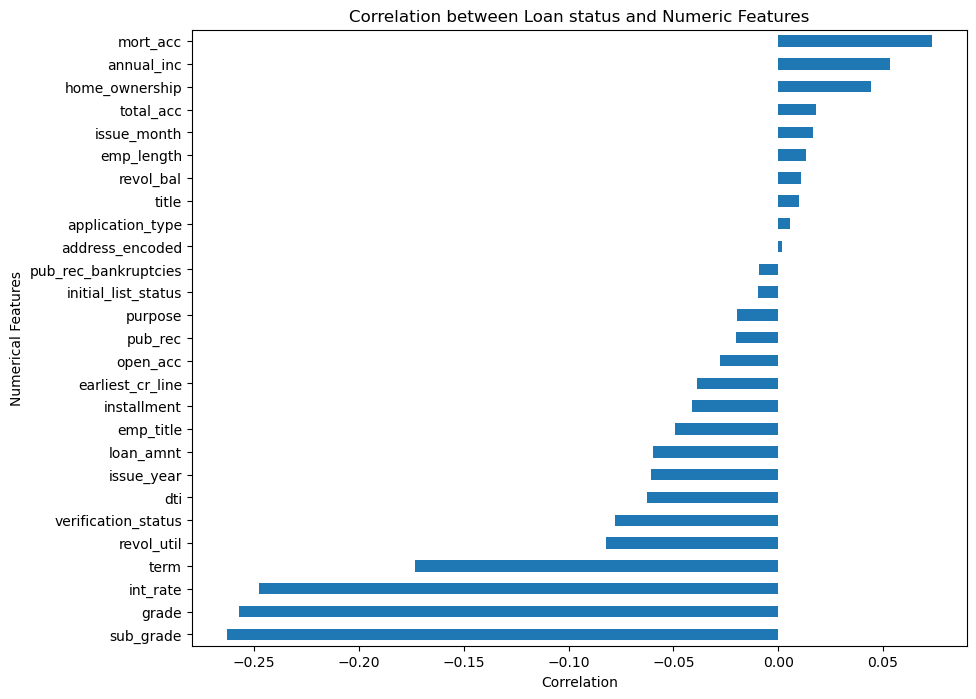

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Load the dataset
data = pd.read_csv("lending_club_loan_two.csv")

# Define mappings for non-numeric columns
home_ownership_mapping = {'MORTGAGE': 4, 'RENT': 3, 'OWN': 5, 'ANY': 2, 'OTHER': 1, 'NONE': 0}
term_mapping = {'36 months': 1, '60 months': 2}
application_type_mapping = {'INDIVIDUAL': 1, 'JOINT': 2}
verification_status_mapping = {'Not Verified': 1, 'Source Verified': 2, 'Verified': 3}
loan_status_mapping = {'Fully Paid': 1, 'Charged Off': 0}

# Convert non-numeric columns to numeric where applicable
if 'term' in data.columns:
    data['term'] = data['term'].str.extract('(\d+)').astype(float)

if 'emp_length' in data.columns:
    data['emp_length'] = data['emp_length'].str.extract('(\d+)').astype(float)

if 'home_ownership' in data.columns:
    data['home_ownership'] = data['home_ownership'].map(home_ownership_mapping)

if 'verification_status' in data.columns:
    data['verification_status'] = data['verification_status'].map(verification_status_mapping)

if 'loan_status' in data.columns:
    data['loan_status'] = data['loan_status'].map(loan_status_mapping)

if 'application_type' in data.columns:
    data['application_type'] = data['application_type'].map(application_type_mapping)

# Convert 'issue_d' column to datetime
data['issue_d'] = pd.to_datetime(data['issue_d'])

# Extract year and month from 'issue_d'
data['issue_year'] = data['issue_d'].dt.year
data['issue_month'] = data['issue_d'].dt.month

# Drop 'issue_d' column as it's no longer needed
data = data.drop('issue_d', axis=1)

# Convert 'purpose' and 'title' columns using label encoding
label_encoder = LabelEncoder()
data['purpose'] = label_encoder.fit_transform(data['purpose'])
data['title'] = label_encoder.fit_transform(data['title'])

# Include 'earliest_cr_line' column in numeric_data
if 'earliest_cr_line' in data.columns:
    data['earliest_cr_line'] = pd.to_datetime(data['earliest_cr_line']).dt.year

# Use label encoding for 'emp_title', 'grade', and 'sub_grade' columns
label_columns = ['emp_title', 'grade', 'sub_grade']
for column in label_columns:
    data[column] = label_encoder.fit_transform(data[column])

# Encode the 'initial_list_status' column
data['initial_list_status'] = data['initial_list_status'].apply(lambda x: 1 if x == 'w' else 0)

# Initialize label encoder for the 'address' column
label_encoder_address = LabelEncoder()

# Encode the 'address' column
data['address_encoded'] = label_encoder_address.fit_transform(data['address'])

# Compute correlation matrix for numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# Drop rows with missing values
data = data.dropna()

# Compute correlation matrix for numeric columns
corr_matrix = numeric_data.corr()

# Plot the correlation
corr_matrix['loan_status'].drop('loan_status').sort_values().plot.barh(
    figsize=(10, 8), 
    title="Correlation between Loan status and Numeric Features", 
    xlabel='Correlation', 
    ylabel='Numerical Features'
)
plt.show()


In [57]:

# The length of the data
print(f"The Length of the data: {data.shape}")

The Length of the data: (340514, 29)


In [58]:

# Missing values
for column in data.columns:
    if data[column].isna().sum() != 0:
        missing = data[column].isna().sum()
        portion = (missing / data.shape[0]) * 100
        print(f"'{column}': number of missing values '{missing}' ==> '{portion:.3f}%'")

In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats 
import matplotlib.pyplot as plt
import hvplot.pandas
data = pd.read_csv("lending_club_loan_two.csv")
data.emp_title.nunique()

173105

In [60]:

data.drop('emp_title', axis=1, inplace=True)

In [61]:

data.emp_length.unique()

array(['10+ years', '4 years', '< 1 year', '6 years', '9 years',
       '2 years', '3 years', '8 years', '7 years', '5 years', '1 year',
       nan], dtype=object)

In [62]:


for year in data.emp_length.unique():
    print(f"{year} years in this position:")
    print(f"{data[data.emp_length == year].loan_status.value_counts(normalize=True)}")
    print('==========================================')

10+ years years in this position:
loan_status
Fully Paid    0.82
Charged Off   0.18
Name: proportion, dtype: float64
4 years years in this position:
loan_status
Fully Paid    0.81
Charged Off   0.19
Name: proportion, dtype: float64
< 1 year years in this position:
loan_status
Fully Paid    0.79
Charged Off   0.21
Name: proportion, dtype: float64
6 years years in this position:
loan_status
Fully Paid    0.81
Charged Off   0.19
Name: proportion, dtype: float64
9 years years in this position:
loan_status
Fully Paid    0.80
Charged Off   0.20
Name: proportion, dtype: float64
2 years years in this position:
loan_status
Fully Paid    0.81
Charged Off   0.19
Name: proportion, dtype: float64
3 years years in this position:
loan_status
Fully Paid    0.80
Charged Off   0.20
Name: proportion, dtype: float64
8 years years in this position:
loan_status
Fully Paid    0.80
Charged Off   0.20
Name: proportion, dtype: float64
7 years years in this position:
loan_status
Fully Paid    0.81
Charged Off   

In [63]:


data.drop('emp_length', axis=1, inplace=True)

In [64]:

data.title.value_counts().head()

title
Debt consolidation         152472
Credit card refinancing     51487
Home improvement            15264
Other                       12930
Debt Consolidation          11608
Name: count, dtype: int64

In [65]:

data.purpose.value_counts().head()

purpose
debt_consolidation    234507
credit_card            83019
home_improvement       24030
other                  21185
major_purchase          8790
Name: count, dtype: int64

In [66]:

data.drop('title', axis=1, inplace=True)

In [67]:

data.mort_acc.value_counts()

mort_acc
0.00     139777
1.00      60416
2.00      49948
3.00      38049
4.00      27887
5.00      18194
6.00      11069
7.00       6052
8.00       3121
9.00       1656
10.00       865
11.00       479
12.00       264
13.00       146
14.00       107
15.00        61
16.00        37
17.00        22
18.00        18
19.00        15
20.00        13
24.00        10
22.00         7
21.00         4
25.00         4
27.00         3
32.00         2
31.00         2
23.00         2
26.00         2
28.00         1
30.00         1
34.00         1
Name: count, dtype: int64

In [68]:

data.mort_acc.isna().sum()

37795

<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_13519/655857007.py:3: SyntaxWarning: invalid escape sequence '\d'
  data['term'] = data['term'].astype(str).str.extract('(\d+)').astype(float)


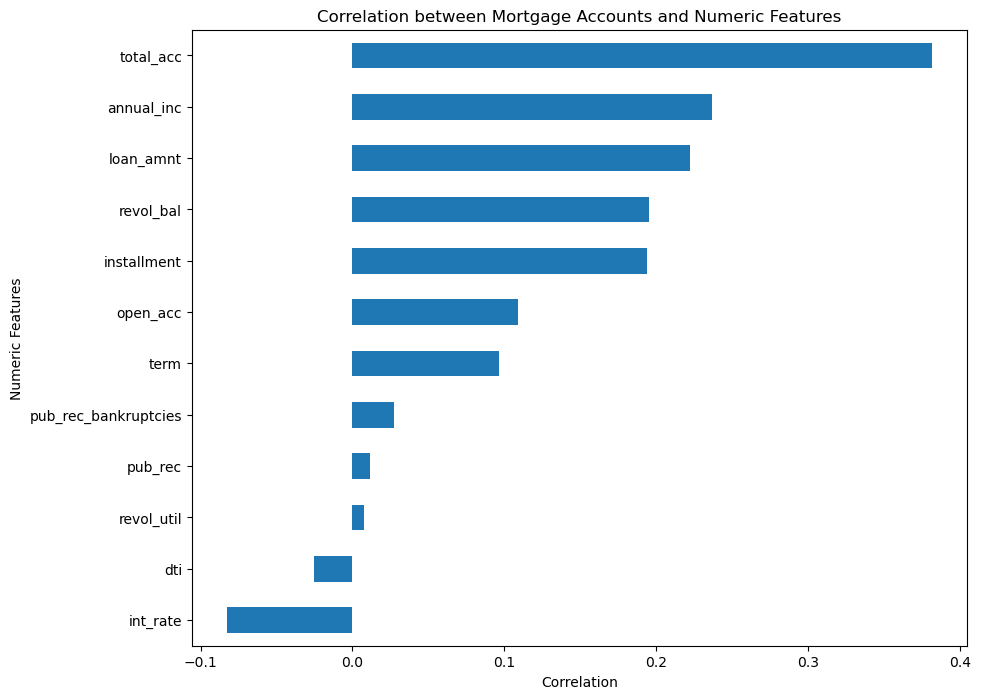

In [69]:
# Handle 'term' column by extracting numeric part if it's not already dropped
if 'term' in data.columns:
    data['term'] = data['term'].astype(str).str.extract('(\d+)').astype(float)

# Compute correlation matrix for numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# Drop rows with missing values
data = data.dropna()

# Compute correlation matrix for numeric columns
corr_matrix = numeric_data.corr()

# Plot the correlation
corr_matrix['mort_acc'].drop('mort_acc').sort_values().plot.barh(
    figsize=(10, 8), 
    title="Correlation between Mortgage Accounts and Numeric Features", 
    xlabel='Correlation', 
    ylabel='Numeric Features'
)
plt.show()


In [70]:
# Convert 'mort_acc' column to numeric, coerce errors to NaN
data['mort_acc'] = pd.to_numeric(data['mort_acc'], errors='coerce')

# Drop rows with NaN values in 'mort_acc' column
data = data.dropna(subset=['mort_acc'])

# Group by 'total_acc' and calculate the mean of 'mort_acc'
total_acc_avg = data.groupby(by='total_acc')['mort_acc'].mean()

# Display the result
print(total_acc_avg)


total_acc
2.00     0.00
3.00     0.05
4.00     0.07
5.00     0.10
6.00     0.15
         ... 
124.00   1.00
129.00   1.00
135.00   3.00
150.00   2.00
151.00   0.00
Name: mort_acc, Length: 118, dtype: float64


In [71]:


def fill_mort_acc(total_acc, mort_acc):
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc].round()
    else:
        return mort_acc

In [72]:

data['mort_acc'] = data.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

In [73]:

for column in data.columns:
    if data[column].isna().sum() != 0:
        missing = data[column].isna().sum()
        portion = (missing / data.shape[0]) * 100
        print(f"'{column}': number of missing values '{missing}' ==> '{portion:.3f}%'")

In [74]:
data.dropna(inplace=True)

In [75]:
data.shape

(358014, 24)

In [76]:
import pandas as pd
# Load the dataset
data = pd.read_csv("lending_club_loan_two.csv")

# Total null values in the dataset
total=data.isnull().sum()
# Percentage of missing values in each column
percent=(data.isnull().sum()/data.shape[0])*100

missing_value=pd.concat([total,percent],axis=1,keys=['total_missing_values','percentage_missing_values'])
print(missing_value)

                      total_missing_values  percentage_missing_values
loan_amnt                                0                       0.00
term                                     0                       0.00
int_rate                                 0                       0.00
installment                              0                       0.00
grade                                    0                       0.00
sub_grade                                0                       0.00
emp_title                            22927                       5.79
emp_length                           18301                       4.62
home_ownership                           0                       0.00
annual_inc                               0                       0.00
verification_status                      0                       0.00
issue_d                                  0                       0.00
loan_status                              0                       0.00
purpose             

In [77]:
print([column for column in data.columns if data[column].dtype == object])

['term', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'title', 'earliest_cr_line', 'initial_list_status', 'application_type', 'address']


In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats 
import matplotlib.pyplot as plt
import hvplot.pandas
data = pd.read_csv("lending_club_loan_two.csv")
data.term.unique()

array([' 36 months', ' 60 months'], dtype=object)

In [79]:
term_values = {' 36 months': 36, ' 60 months': 60}
data['term'] = data.term.map(term_values)

In [80]:
data.term.unique()

array([36, 60])

In [81]:
data.drop('grade', axis=1, inplace=True)

In [82]:
dummies = ['sub_grade', 'verification_status', 'purpose', 'initial_list_status', 
           'application_type', 'home_ownership']
data = pd.get_dummies(data, columns=dummies, drop_first=True)

In [83]:
data.address.head()

0       0174 Michelle Gateway\nMendozaberg, OK 22690
1    1076 Carney Fort Apt. 347\nLoganmouth, SD 05113
2    87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113
3              823 Reid Ford\nDelacruzside, MA 00813
4               679 Luna Roads\nGreggshire, VA 11650
Name: address, dtype: object

In [84]:
data['zip_code'] = data.address.apply(lambda x: x[-5:])

In [85]:
data.zip_code.value_counts()

zip_code
70466    56985
30723    56546
22690    56527
48052    55917
00813    45824
29597    45471
05113    45402
11650    11226
93700    11151
86630    10981
Name: count, dtype: int64

In [86]:
data = pd.get_dummies(data, columns=['zip_code'], drop_first=True)

In [87]:
data.drop('address', axis=1, inplace=True)

In [88]:
data.drop('issue_d', axis=1, inplace=True)

In [89]:
# Convert 'earliest_cr_line' to datetime with error handling
try:
    data['earliest_cr_line'] = pd.to_datetime(data['earliest_cr_line'])
    # Extract year from 'earliest_cr_line'
    data['earliest_cr_line'] = data['earliest_cr_line'].dt.year
except pd.errors.OutOfBoundsDatetime:
    # Handle the case where conversion is not possible
    data['earliest_cr_line'] = np.nan

    

#data['earliest_cr_line'] = data.earliest_cr_line.dt.year

/tmp/ipykernel_13519/3472296503.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['earliest_cr_line'] = pd.to_datetime(data['earliest_cr_line'])


In [90]:
data.earliest_cr_line.nunique()

65

In [91]:
data.earliest_cr_line.value_counts()

earliest_cr_line
2000    29366
2001    29083
1999    26491
2002    25901
2003    23657
        ...  
1951        3
1950        3
1953        2
1944        1
1948        1
Name: count, Length: 65, dtype: int64

In [92]:
w_p = data.loan_status.value_counts()[0] / data.shape[0]
w_n = data.loan_status.value_counts()[1] / data.shape[0]

print(f"Weight of positive values {w_p}")
print(f"Weight of negative values {w_n}")

Weight of positive values 0.8038709188697826
Weight of negative values 0.1961290811302174


/tmp/ipykernel_13519/2598508790.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  w_p = data.loan_status.value_counts()[0] / data.shape[0]
/tmp/ipykernel_13519/2598508790.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  w_n = data.loan_status.value_counts()[1] / data.shape[0]


In [93]:
train, test = train_test_split(data, test_size=0.33, random_state=42)

print(train.shape)
print(test.shape)

(265340, 84)
(130690, 84)


In [94]:

print(train[train['dti'] <= 50].shape)
print(train.shape)

(265318, 84)
(265340, 84)


In [95]:

print(train.shape)
train = train[train['annual_inc'] <= 250000]
train = train[train['dti'] <= 50]
train = train[train['open_acc'] <= 40]
train = train[train['total_acc'] <= 80]
train = train[train['revol_util'] <= 120]
train = train[train['revol_bal'] <= 250000]
print(train.shape)

(265340, 84)
(262462, 84)


In [96]:
X_train, y_train = train.drop('loan_status', axis=1), train.loan_status
X_test, y_test = test.drop('loan_status', axis=1), test.loan_status

In [97]:
X_train.dtypes

loan_amnt         float64
term                int64
int_rate          float64
installment       float64
emp_title          object
                   ...   
zip_code_30723       bool
zip_code_48052       bool
zip_code_70466       bool
zip_code_86630       bool
zip_code_93700       bool
Length: 83, dtype: object

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from joblib import dump, load
import matplotlib.pyplot as plt
from xgboost import XGBClassifier

# Load the dataset
data = pd.read_csv("lending_club_loan_two.csv")

# Define mappings and transformations for non-numeric columns
home_ownership_mapping = {'MORTGAGE': 4, 'RENT': 3, 'OWN': 5, 'ANY': 2, 'OTHER': 1, 'NONE': 0}
term_mapping = {'36 months': 1, '60 months': 2}
verification_status_mapping = {'Not Verified': 1, 'Source Verified': 2, 'Verified': 3}
loan_status_mapping = {'Fully Paid': 1, 'Charged Off': 0}
application_type_mapping = {'INDIVIDUAL': 1, 'JOINT': 2}

# Convert non-numeric columns to numeric
if 'term' in data.columns:
    data['term'] = data['term'].astype(str).str.extract('(\d+)').astype(float)

# Other mappings and transformations here...

# Convert 'issue_d' column to datetime
data['issue_d'] = pd.to_datetime(data['issue_d'])
data['issue_year'] = data['issue_d'].dt.year
data['issue_month'] = data['issue_d'].dt.month

# Drop 'issue_d' column
data = data.drop('issue_d', axis=1)

# Drop rows with missing values
data = data.dropna()

# Include relevant non-numeric columns in the dataset
non_numeric_cols = ['home_ownership', 'verification_status', 'loan_status', 'application_type']
data['home_ownership'] = data['home_ownership'].map(home_ownership_mapping)
data['verification_status'] = data['verification_status'].map(verification_status_mapping)
data['loan_status'] = data['loan_status'].map(loan_status_mapping)
data['application_type'] = data['application_type'].map(application_type_mapping)

# Define features and target variables
X = data.drop('loan_status', axis=1)
y = data['loan_status']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

from sklearn.preprocessing import OrdinalEncoder

# Combine train and test data for fitting the OrdinalEncoder
combined_data = pd.concat([X_train, X_test])

# Initialize OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

# Fit and transform the combined data
combined_data_encoded = ordinal_encoder.fit_transform(combined_data)

# Transform train and test data
X_train_encoded = ordinal_encoder.transform(X_train)
X_test_encoded = ordinal_encoder.transform(X_test)

# Replace original columns with encoded ones
X_train[['emp_title', 'grade', 'sub_grade']] = X_train_encoded[:, :3]
X_test[['emp_title', 'grade', 'sub_grade']] = X_test_encoded[:, :3]


# Include the encoded 'initial_list_status' column
X_train['initial_list_status'] = X_train['initial_list_status'].apply(lambda x: 1 if x == 'w' else 0)
X_test['initial_list_status'] = X_test['initial_list_status'].apply(lambda x: 1 if x == 'w' else 0)

# Combine train and test data for fitting the LabelEncoder
combined_data_address = pd.concat([X_train['address'], X_test['address']])

# Initialize LabelEncoder
label_encoder_address = LabelEncoder()

# Fit and transform the combined data
combined_data_address_encoded = label_encoder_address.fit_transform(combined_data_address)

# Transform train and test data
X_train['address_encoded'] = label_encoder_address.transform(X_train['address'])
X_test['address_encoded'] = label_encoder_address.transform(X_test['address'])

# Drop non-numeric columns
non_numeric_cols = X_train.select_dtypes(exclude=['float64', 'int64']).columns
X_train = X_train.drop(non_numeric_cols, axis=1)
X_test = X_test.drop(non_numeric_cols, axis=1)

# Imputation and scaling
imputer = SimpleImputer(strategy='constant', fill_value=0)
scaler = MinMaxScaler()

X_train = scaler.fit_transform(imputer.fit_transform(X_train))
X_test = scaler.transform(imputer.transform(X_test))

# Initialize LabelEncoder for the target variable
label_encoder_y = LabelEncoder()

# Encode the target variable
y_train_encoded = label_encoder_y.fit_transform(y_train)
y_test_encoded = label_encoder_y.transform(y_test)

# Imputation and scaling
imputer = SimpleImputer(strategy='constant', fill_value=0)
scaler = MinMaxScaler()

X_train = scaler.fit_transform(imputer.fit_transform(X_train))
X_test = scaler.transform(imputer.transform(X_test))

# Define and train the XGBoost model with optimized hyperparameters
xgb = XGBClassifier(
    n_estimators=1000,  # Number of trees
    learning_rate=0.05,  # Step size shrinkage used in update to prevent overfitting
    max_depth=5,         # Maximum depth of a tree
    min_child_weight=1,  # Minimum sum of instance weight (hessian) needed in a child
    gamma=0,             # Minimum loss reduction required to make a further partition on a leaf node of the tree
    subsample=0.8,       # Subsample ratio of the training instance
    colsample_bytree=0.8,  # Subsample ratio of columns when constructing each tree
    objective='binary:logistic',  # Objective function
    nthread=4,  # Number of parallel threads used to run XGBoost
    scale_pos_weight=1,  # Control the balance of positive and negative weights
    seed=42  # Random seed
)



# Define and train the neural network model
def nn_model(num_columns, num_labels, hidden_units, dropout_rates, learning_rate):
    inp = Input(shape=(num_columns,))
    x = BatchNormalization()(inp)
    x = Dropout(dropout_rates[0])(x)
    for i in range(len(hidden_units)):
        x = Dense(hidden_units[i], activation='relu')(x)
        x = BatchNormalization()(x)
        x = Dropout(dropout_rates[i + 1])(x)
    x = Dense(num_labels, activation='sigmoid')(x)
    model = Model(inputs=inp, outputs=x)
    model.compile(optimizer=Adam(learning_rate), loss='binary_crossentropy', metrics=['AUC'])
    return model


# Fit the model
xgb.fit(X_train, y_train_encoded)

# Make predictions on the test set
y_test_pred = xgb.predict(X_test)

# Initialize LabelEncoder for the target variable
label_encoder_y = LabelEncoder()

# Encode the target variable
y_train_encoded = label_encoder_y.fit_transform(y_train)
y_test_encoded = label_encoder_y.transform(y_test)


num_columns = X_train.shape[1]
num_labels = 1
hidden_units = [150, 150, 150]
dropout_rates = [0.1, 0, 0.1, 0]
learning_rate = 1e-3

model = nn_model(
    num_columns=num_columns,
    num_labels=num_labels,
    hidden_units=hidden_units,
    dropout_rates=dropout_rates,
    learning_rate=learning_rate
)


history = model.fit(
    X_train, y_train_encoded,
    validation_data=(X_test, y_test_encoded),
    epochs=20,
    batch_size=32
)

# Make predictions on the test set
y_test_pred = model.predict(X_test)
roc_auc = roc_auc_score(y_test_encoded, y_test_pred)
# Adjust predictions based on threshold
y_test_pred_adjusted = (y_test_pred >= 0.5).astype(int)

# Evaluate the model
print("XGBoost Evaluation:")
print(classification_report(y_test_encoded, y_test_pred_adjusted))
print("Confusion Matrix:")
print(confusion_matrix(y_test_encoded, y_test_pred_adjusted))
print("ROC AUC Score:", roc_auc_score(y_test_encoded, y_test_pred))
# Save the model
dump(xgb, 'xgboost_model.pkl')

# Load the model and make predictions
loaded_model = load('xgboost_model.pkl')
print("Loaded Model Predictions:")
print(loaded_model.predict(X_test))


# Evaluate the model
print("Neural Network Evaluation:")
print(classification_report(y_test_encoded, y_test_pred_adjusted))
print("Confusion Matrix:")
print(confusion_matrix(y_test_encoded, y_test_pred_adjusted))
print("ROC AUC Score:", roc_auc)

# Save the model
dump(model, 'model20.pkl')

# Load the model and make predictions
loaded_model = load('model20.pkl')
print("Loaded Model Predictions:")
print(loaded_model.predict(X_test))

def plot_learning_evolution(r):
    plt.figure(figsize=(12, 8))
    
    plt.subplot(2, 2, 1)
    plt.plot(r.history['loss'], label='Loss')
    plt.plot(r.history['val_loss'], label='Validation Loss')
    plt.title('Loss Evolution During Training')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(2, 2, 2)
    plt.plot(r.history['auc'], label='AUC')
    plt.plot(r.history['val_auc'], label='Validation AUC')
    plt.title('AUC Score Evolution During Training')
    plt.xlabel('Epoch')
    plt.ylabel('AUC Score')
    plt.legend()

    plt.show()

plot_learning_evolution(history)

# Make predictions on the test set
y_test_pred = model.predict(X_test)
roc_auc = roc_auc_score(y_test_encoded, y_test_pred)

# Adjust predictions based on threshold
y_test_pred_adjusted = (y_test_pred >= 0.5).astype(int)

#Evaluate the model
print("Neural Network Evaluation:")
print(classification_report(y_test_encoded, y_test_pred_adjusted))
print("Confusion Matrix:")
print(confusion_matrix(y_test_encoded, y_test_pred_adjusted))
print("ROC AUC Score:", roc_auc)

#Save the model
dump(model, 'model20.pkl')

#Load the model and make predictions
loaded_model = load('model20.pkl')
print("Loaded Model Predictions:")
print(loaded_model.predict(X_test))


#Plot learning evolution
plot_learning_evolution(history)


#This code completes the neural network model training, evaluation, and prediction, along with saving and loading the model. Additionally, it includes a function to plot the learning evolution during training. Make sure to have all necessary libraries installed and the dataset "lending_club_loan_two.csv" available in your working directory.


<>:26: SyntaxWarning: invalid escape sequence '\d'
<>:26: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_13519/3222228406.py:26: SyntaxWarning: invalid escape sequence '\d'
  data['term'] = data['term'].astype(str).str.extract('(\d+)').astype(float)
/tmp/ipykernel_13519/3222228406.py:31: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['issue_d'] = pd.to_datetime(data['issue_d'])
2024-11-30 22:44:15.646846: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Epoch 1/20
7033/7033 ━━━━━━━━━━━━━━━━━━━━ 27s 3ms/step - AUC: 0.6666 - loss: 0.4835 - val_AUC: 0.7037 - val_loss: 0.4556
Epoch 2/20
7033/7033 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - AUC: 0.6970 - loss: 0.4563 - val_AUC: 0.7065 - val_loss: 0.4546
Epoch 3/20
2919/7033 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - AUC: 0.7022 - loss: 0.4529

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# Load the dataset
data = pd.read_csv("lending_club_loan_two.csv")

# Drop the specified columns
data = data.drop(columns=['mort_acc', 'pub_rec', 'pub_rec_bankruptcies'])
term_mapping = {'36 months': 1, '60 months': 2}
application_type_mapping = {'INDIVIDUAL': 1, 'JOINT': 2}
verification_status_mapping = { 'Not Verified': 1, 'Source Verified': 2, 'Verified': 3 }
loan_status_mapping = { 'Fully Paid': 1,'Charged Off': 0 }
# Convert non-numeric columns to numeric where applicable
if 'term' in data.columns:
    data['term'] = data['term'].astype(str).str.extract('(\d+)').astype(float)
if 'emp_length' in data.columns:
    data['emp_length'] = data['emp_length'].astype(str).str.extract('(\d+)')  # Extract numeric part
    data['emp_length'] = pd.to_numeric(data['emp_length'], errors='coerce')  # Convert to numeric
    data['emp_length'].fillna(data['emp_length'].median(), inplace=True)  # Fill missing values with median
# Convert verification_status to numeric using the mapping
data['verification_status'] = data['verification_status'].map(verification_status_mapping)
# Map loan_status to numerical values
data['loan_status'] = data['loan_status'].map(loan_status_mapping)
# Map application_type to numerical values
data['application_type'] = data['application_type'].map(application_type_mapping)
# Drop rows with missing values
data = data.dropna()
# Include 'earliest_cr_line' column in numeric_data
if 'earliest_cr_line' in data.columns:
    data['earliest_cr_line'] = pd.to_datetime(data['earliest_cr_line']).dt.year
label_columns = ['emp_title', 'grade', 'sub_grade']
for column in label_columns:
    data[column] = LabelEncoder().fit_transform(data[column])
# Initialize label encoder for the 'address' column
label_encoder_address = LabelEncoder()
# Encode the 'address' column
data['address_encoded'] = label_encoder_address.fit_transform(data['address'])
# Compute correlation matrix for numeric columns
numeric_data = data.select_dtypes(include=[np.number])
# Include the encoded 'address' column in numeric_data
numeric_data['address_encoded'] = data['address_encoded']

# Split data into features (X) and target variable (y)
X = numeric_data.drop(columns=['loan_status'])
y = numeric_data['loan_status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest classifier
rf_clf = RandomForestClassifier(n_estimators=80)
rf_clf.fit(X_train, y_train)

# Make predictions on test data
y_test_pred = rf_clf.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

print("Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Charged Off', 'Fully Paid'])
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from xgboost import XGBClassifier, plot_importance
from sklearn.metrics import RocCurveDisplay

# Load the dataset
data = pd.read_csv("lending_club_loan_two.csv")

# Drop the specified columns
data = data.drop(columns=['mort_acc', 'pub_rec', 'pub_rec_bankruptcies'])

term_mapping = {'36 months': 1,
                '60 months': 2}

application_type_mapping = {'INDIVIDUAL': 1,
                            'JOINT': 2}

verification_status_mapping = {
    'Not Verified': 1,
    'Source Verified': 2,
    'Verified': 3
}

loan_status_mapping = {
    'Fully Paid': 1,
    'Charged Off': 0
}

# Convert non-numeric columns to numeric where applicable
if 'term' in data.columns:
    data['term'] = data['term'].astype(str).str.extract('(\d+)').astype(float)

if 'emp_length' in data.columns:
    data['emp_length'] = data['emp_length'].astype(str).str.extract('(\d+)')  # Extract numeric part
    data['emp_length'] = pd.to_numeric(data['emp_length'], errors='coerce')  # Convert to numeric
    data['emp_length'].fillna(data['emp_length'].median(), inplace=True)  # Fill missing values with median

# Convert verification_status to numeric using the mapping
data['verification_status'] = data['verification_status'].map(verification_status_mapping)

# Map loan_status to numerical values
data['loan_status'] = data['loan_status'].map(loan_status_mapping)

# Map application_type to numerical values
data['application_type'] = data['application_type'].map(application_type_mapping)

# Drop rows with missing values
data = data.dropna()

# Include 'earliest_cr_line' column in numeric_data
if 'earliest_cr_line' in data.columns:
    data['earliest_cr_line'] = pd.to_datetime(data['earliest_cr_line']).dt.year

# Use label encoding for 'emp_title', 'grade', and 'sub_grade' columns
label_columns = ['emp_title', 'grade', 'sub_grade']
for column in label_columns:
    data[column] = LabelEncoder().fit_transform(data[column])

# Initialize label encoder for the 'address' column
label_encoder_address = LabelEncoder()

# Encode the 'address' column
data['address_encoded'] = label_encoder_address.fit_transform(data['address'])

# Compute correlation matrix for numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# Include the encoded 'address' column in numeric_data
numeric_data['address_encoded'] = data['address_encoded']

# Split data into features (X) and target variable (y)
X = numeric_data.drop(columns=['loan_status'])
y = numeric_data['loan_status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the XGBoost classifier
xgb_clf = XGBClassifier(use_label_encoder=False)
xgb_clf.fit(X_train, y_train)

# Make predictions on test data
y_test_pred = xgb_clf.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

print("Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Charged Off', 'Fully Paid'])
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

# Display ROC curve
roc_disp = RocCurveDisplay.from_estimator(xgb_clf, X_test, y_test)
roc_disp.plot()
plt.title('ROC Curve')
plt.show()

# Plot feature importance
plot_importance(xgb_clf, importance_type='weight')
plt.title('Feature Importance')
plt.show()


In [ ]:
import pandas as pd
import holoviews as hv

# Assuming you have already computed accuracy scores for each model and stored them in a dictionary
accuracy_dict = {
    'Random Forest': 0.8110,
    'XGBoost': 0.8127,
    'ANNs': 0.7115272307238497
}

# Convert the dictionary to a list of tuples
accuracy_list = [(model, score) for model, score in accuracy_dict.items()]

# Now you can create a DataFrame from accuracy_list and visualize it
accuracy_df = pd.DataFrame(accuracy_list, columns=['Model', 'Accuracy'])

# Plotting the Accuracy Scores using HoloViews
accuracy_plot = accuracy_df.hvplot.barh(
    x='Model', y='Accuracy',
    width=500, height=400, 
    title="Accuracy Scores of ML Models", xlabel="Accuracy", 
    alpha=0.4, legend='top'
)
# Print the DataFrame and the plot
print("Accuracy Scores:")
print(accuracy_df)
print("\n")
print("Plotting the Accuracy Scores:")
accuracy_plot


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

# Load the dataset
data = pd.read_csv("lending_club_loan_two.csv")

# Drop the specified columns
data = data.drop(columns=['mort_acc', 'pub_rec', 'pub_rec_bankruptcies'])

term_mapping = {'36 months': 1,
                '60 months': 2}

application_type_mapping = {'INDIVIDUAL': 1,
                            'JOINT': 2}

verification_status_mapping = {
    'Not Verified': 1,
    'Source Verified': 2,
    'Verified': 3
}

loan_status_mapping = {
    'Fully Paid': 1,
    'Charged Off': 0
}

# Convert non-numeric columns to numeric where applicable
if 'term' in data.columns:
    data['term'] = data['term'].astype(str).str.extract('(\d+)').astype(float)

if 'emp_length' in data.columns:
    data['emp_length'] = data['emp_length'].astype(str).str.extract('(\d+)')  # Extract numeric part
    data['emp_length'] = pd.to_numeric(data['emp_length'], errors='coerce')  # Convert to numeric
    data['emp_length'].fillna(data['emp_length'].median(), inplace=True)  # Fill missing values with median

# Convert verification_status to numeric using the mapping
data['verification_status'] = data['verification_status'].map(verification_status_mapping)

# Map loan_status to numerical values
data['loan_status'] = data['loan_status'].map(loan_status_mapping)

# Map application_type to numerical values
data['application_type'] = data['application_type'].map(application_type_mapping)

# Drop rows with missing values
data = data.dropna()

# Include 'earliest_cr_line' column in numeric_data
if 'earliest_cr_line' in data.columns:
    data['earliest_cr_line'] = pd.to_datetime(data['earliest_cr_line']).dt.year

# Use label encoding for 'emp_title', 'grade', and 'sub_grade' columns
label_columns = ['emp_title', 'grade', 'sub_grade']
for column in label_columns:
    data[column] = LabelEncoder().fit_transform(data[column])

# Initialize label encoder for the 'address' column
label_encoder_address = LabelEncoder()

# Encode the 'address' column
data['address_encoded'] = label_encoder_address.fit_transform(data['address'])

# Compute correlation matrix for numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# Include the encoded 'address' column in numeric_data
numeric_data['address_encoded'] = data['address_encoded']

# Split data into features (X) and target variable (y)
X = numeric_data.drop(columns=['loan_status'])
y = numeric_data['loan_status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the XGBoost classifier
xgb_clf = XGBClassifier(use_label_encoder=False)
xgb_clf.fit(X_train, y_train)

# Visualize feature importance
feature_importance = xgb_clf.feature_importances_
sorted_idx = np.argsort(feature_importance)[::-1]

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance[sorted_idx], y=X.columns[sorted_idx], palette='viridis')
plt.title("XGBoost Feature Importance")
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


In [ ]:
import joblib

# Assuming 'rf_clf' or 'xgb_clf' is your trained machine learning model
joblib.dump(xgb_clf, open("model20.pkl", "wb"))

# Load the model
model = joblib.load('model20.pkl')

# Now you can use the loaded model to make predictions
model.predict(X_test)
